# Train images

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from exp.nb_Tesis import *
from PIL import ImageOps

In [3]:

from torchvision.utils import save_image


In [29]:
path_train_imgs_2017 = Path('2017/data/ISIC-2017_Training_Data/')
path_valid_imgs_2017 = Path('2017/data/ISIC-2017_Validation_Data/')

In [30]:
list_of_train_imgs_paths = get_image_files(path_train_imgs_2017)
list_of_valid_imgs_paths = get_image_files(path_valid_imgs_2017)

In [59]:
img = PIL.Image.open(list_of_train_imgs_paths[0])


In [64]:
img = open_image(list_of_train_imgs_paths[0]);

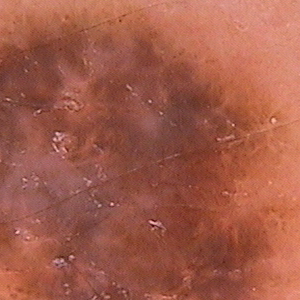

In [66]:
crop(img,300)

In [68]:
img.save(de)

TypeError: save() missing 1 required positional argument: 'fn'

In [15]:
img2 = img.apply_tfms([crop_pad()], size=(284,284), resize_method=ResizeMethod.CROP);

In [46]:
save_image(img2.data,'2017/resized_data/asd.jpg')

In [27]:
p = list_of_train_imgs_paths[0]

In [47]:
p.parent.parent.parent / 'resized_data' / 'asd' / p.name

PosixPath('2017/resized_data/asd/ISIC_0000331.jpg')

In [49]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [56]:
 

number_of_imgs = len(list_of_valid_imgs_paths)
for idx, image_path in enumerate(list_of_valid_imgs_paths):
    img = open_image(image_path)
    resized_img = img.apply_tfms([crop_pad()], size=(224,224), resize_method=ResizeMethod.CROP);
    new_filepath = image_path.parent.parent.parent / 'resized_data/valid/' / image_path.name
    save_image(resized_img.data, new_filepath)
    update_progress(idx/number_of_imgs)

Progress: [####################] 99.3%


In [13]:
path_valid_imgs_2017.parent

PosixPath('2017/data')

In [16]:
from fastai.vision import *

min_dimension = 300
path_hr = path_train_imgs_2017
path_mr = path_train_imgs_2017.parent/('train_small_' +str(min_dimension))

il = ImageList.from_folder(path_hr)

def resize_one(fn, i, path, size):
    dest = path/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=100)
   

# create smaller image sets the first time this nb is run
sets = [(path_mr, min_dimension)]
for p,size in sets:
    if not p.exists(): 
        print(f"resizing to {size} into {p}")
        parallel(partial(resize_one, path=p, size=size), il.items)

# test images

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from exp.nb_Tesis import *
from PIL import ImageOps

In [2]:

from torchvision.utils import save_image


In [19]:
path_test_imgs_2017 = Path('/data2/mike/ISIC-2017_Test_v2_Data/')

In [20]:
list_of_test_imgs_paths = get_image_files(path_test_imgs_2017)


In [21]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [22]:
from fastai.vision import *

path_hr = path_test_imgs_2017
path_mr = path_test_imgs_2017/'small-256'

il = ImageList.from_folder(path_hr)

def resize_one(fn, i, path, size):
    dest = path/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=100)

# create smaller image sets the first time this nb is run
sets = [(path_mr, 256)]
for p,size in sets:
    if not p.exists(): 
        print(f"resizing to {size} into {p}")
        parallel(partial(resize_one, path=p, size=size), il.items)

# Train 2019

In [4]:
min_dim = 352
path_train_2019 = Path('./ISIC_2019_Training_Input')
path_train_2019_small = path_train_2019.parent / f'small_{min_dim}_ISIC_2019_Training_Input'

path_test_2018 = Path('./ISIC2018_Task3_Test_Input')
path_test_2018_small = path_test_2018.parent / f'small_{min_dim}_ISIC2018_Task3_Test_Input'

crop = True

In [5]:
!ls small_64_ISIC_2019_Training_Input/ | wc -l

25332


In [6]:
from fastai.vision import *

path_hr = path_train_2019
path_mr = path_train_2019_small

# path_hr = path_test_2018
# path_mr = path_test_2018_small

il = ImageList.from_folder(path_hr)

def resize_one(fn, i, path, size):
    dest = path/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=100)
    if crop:
        img = open_image(dest)
        crop(img,min_dim)
        img.save(dest)

# create smaller image sets the first time this nb is run
sets = [(path_mr, min_dim)]
for p,size in sets:
    if not p.exists(): 
        print(f"resizing to {size} into {p}")
        parallel(partial(resize_one, path=p, size=size), il.items)

# Test 2017

In [5]:
path_train_2019 = Path('/data2/mike/ISIC-2017_Test_v2_Data/')

from fastai.vision import *

path_hr = path_train_2019
path_mr = path_train_2019/'small-224'

il = ImageList.from_folder(path_hr)

def resize_one(fn, i, path, size):
    dest = path/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=100)

# create smaller image sets the first time this nb is run
sets = [(path_mr, 224)]
for p,size in sets:
    if not p.exists(): 
        print(f"resizing to {size} into {p}")
        parallel(partial(resize_one, path=p, size=size), il.items)